In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Files
old_scores = 'https://kg-hub.berkeleybop.io/frozen_incoming_data/hp-mp-phenodigm-cache.txt.gz'
new_scores = 'https://kg-hub.berkeleybop.io/kg-phenio/hp-mp_similarities.tar.gz'

old_tar_file = 'hp-mp-phenodigm-cache.txt.gz'
new_tar_file = 'hp-mp_similarities.tar.gz'

old_sim_file = 'hp-mp-phenodigm-cache.txt'
new_sim_file = 'KGPhenio_similarities'

In [3]:
!wget {old_scores}
!gunzip {old_tar_file}

!wget {new_scores}
!tar -xvzf {new_tar_file}

--2022-10-14 13:35:31--  https://kg-hub.berkeleybop.io/frozen_incoming_data/hp-mp-phenodigm-cache.txt.gz
Resolving kg-hub.berkeleybop.io (kg-hub.berkeleybop.io)... 108.138.128.121, 108.138.128.95, 108.138.128.23, ...
Connecting to kg-hub.berkeleybop.io (kg-hub.berkeleybop.io)|108.138.128.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77055797 (73M) [application/x-gzip]
Saving to: ‘hp-mp-phenodigm-cache.txt.gz’

hp-mp-phenodigm-cac 100%[===================>]  73.49M  68.3MB/s    in 1.1s    

2022-10-14 13:35:32 (68.3 MB/s) - ‘hp-mp-phenodigm-cache.txt.gz’ saved [77055797/77055797]

--2022-10-14 13:35:38--  https://kg-hub.berkeleybop.io/kg-phenio/hp-mp_similarities.tar.gz
Resolving kg-hub.berkeleybop.io (kg-hub.berkeleybop.io)... 108.138.128.121, 108.138.128.95, 108.138.128.23, ...
Connecting to kg-hub.berkeleybop.io (kg-hub.berkeleybop.io)|108.138.128.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236293538 (225M) [applicatio

In [6]:
!ls

KGPhenio_similarities
README.md
cosine-similarity-analysis.ipynb
data
figures
hp-mp-phenodigm-cache.txt
hp-mp_similarities.tar.gz
pca-embedding-analysis.ipynb
plot_old_versus_new_phenodigm_resnik_and_jaccard.ipynb


In [4]:
old_sim_pd = pd.read_csv(old_sim_file, sep="\t", header=None)
mapping = {old_sim_pd.columns[0]:'source_old',
           old_sim_pd.columns[1]: 'destination_old', 
           old_sim_pd.columns[2]: 'jaccard_old',            
           old_sim_pd.columns[3]: 'resnik_score_old',
           old_sim_pd.columns[4]: 'subsumer_old',
           }
old_sim_pd = old_sim_pd.rename(columns=mapping)

old_sim_pd['source_old'] = old_sim_pd['source_old'].str.replace('_',':')
old_sim_pd['destination_old'] = old_sim_pd['destination_old'].str.replace('_',':')

old_sim_pd

,source_old,destination_old,jaccard_old,resnik_score_old,subsumer_old
0,HP:0000033,MP:0004014,0.470588,2.659134,MP_0002160;
1,HP:0000033,MP:0020998,0.434783,3.300796,MP_0009198;
2,HP:0000033,MP:0020957,0.363636,2.659134,MP_0002160;
3,HP:0000033,MP:0020869,0.212766,3.300796,MP_0009198;
4,HP:0000033,MP:0020824,0.500000,3.300796,MP_0009198;
...,...,...,...,...,...
13033730,HP:0008609,MP:0004176,0.243243,5.040392,HP_0031703;
13033731,HP:0008609,MP:0030154,0.928571,7.560589,MP_0000049;
13033732,HP:0008609,MP:0030155,0.866667,7.560589,MP_0000049;
13033733,HP:0008609,MP:0030156,0.650000,7.560589,MP_0000049;


<AxesSubplot: ylabel='Frequency'>

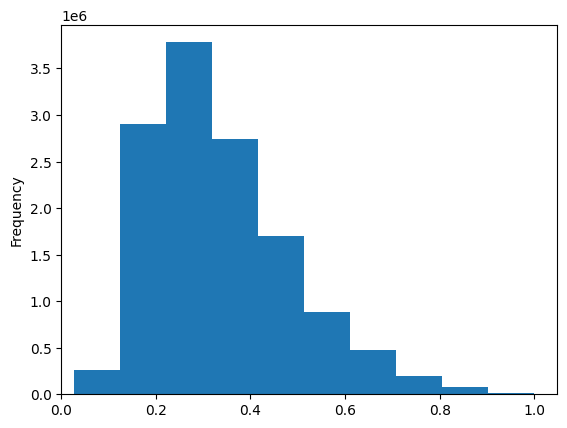

In [9]:
old_sim_pd['jaccard_old'].plot(kind='hist', xlim=0)

<AxesSubplot: ylabel='Frequency'>

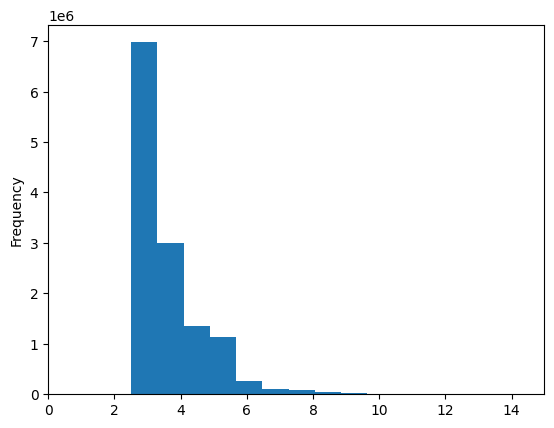

In [10]:
old_sim_pd['resnik_score_old'].plot(kind='hist', bins=15, xlim=0)

In [11]:
new_sim_pd = pd.read_csv(new_sim_file, sep=",")
new_sim_pd

,source,destination,resnik_score,jaccard
0,MP:3000005,MP:3000005,14.526168,1.000000
1,HP:0030350,HP:0030350,14.526168,1.000000
2,MP:0008925,MP:0008925,14.526168,1.000000
3,MP:0008926,MP:0008926,14.526168,1.000000
4,MP:0008926,MP:0013185,14.526168,0.857143
...,...,...,...,...
51383633,HP:0001802,HP:0200054,5.041991,0.214286
51383634,HP:0100142,MP:0009001,5.041991,0.117647
51383635,HP:0010388,MP:0009001,5.041991,0.133333
51383636,HP:0010323,HP:0001802,5.041991,0.214286


<AxesSubplot: ylabel='Frequency'>

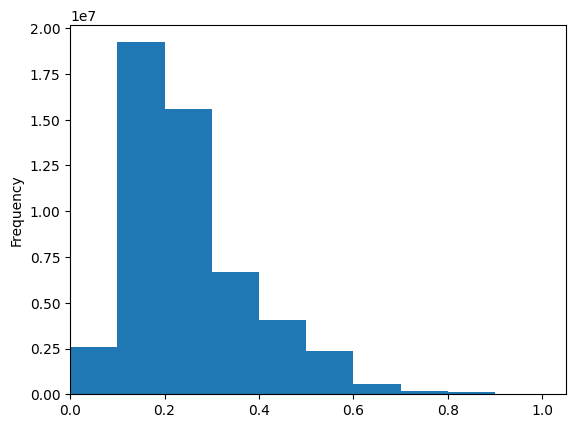

In [13]:
new_sim_pd['jaccard'].plot(kind='hist', xlim=0)

<AxesSubplot: ylabel='Frequency'>

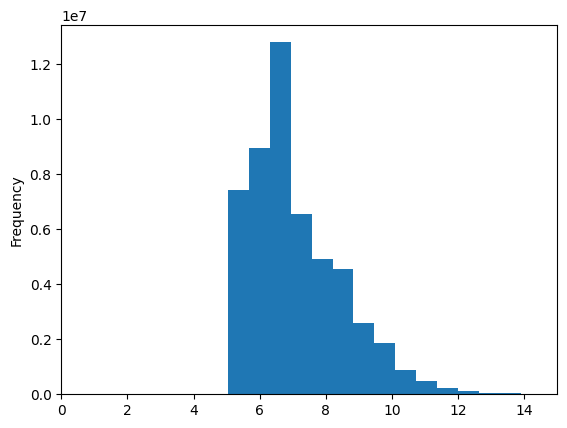

In [12]:
new_sim_pd['resnik_score'].plot(kind='hist', bins=15, xlim=0)

In [15]:
intersected_scores1 = old_sim_pd.merge(new_sim_pd, how='inner',
                                      left_on=['source_old', 'destination_old'], right_on=['source', 'destination'])
intersected_scores2 = old_sim_pd.merge(new_sim_pd, how='inner',
                                      left_on=['source_old', 'destination_old'], right_on=['destination', 'source'])
intersected_scores = pd.concat([intersected_scores1, intersected_scores2])
intersected_scores

,source_old,destination_old,jaccard_old,resnik_score_old,subsumer_old,source,destination,resnik_score,jaccard
0,HP:0000033,MP:0004014,0.470588,2.659134,MP_0002160;,HP:0000033,MP:0004014,5.358735,0.153846
1,HP:0000033,MP:0020998,0.434783,3.300796,MP_0009198;,HP:0000033,MP:0020998,7.041238,0.166667
2,HP:0000033,MP:0020957,0.363636,2.659134,MP_0002160;,HP:0000033,MP:0020957,7.038994,0.153846
3,HP:0000033,MP:0020824,0.500000,3.300796,MP_0009198;,HP:0000033,MP:0020824,6.481542,0.363636
4,HP:0000033,MP:0002771,0.400000,3.300796,MP_0009198;,HP:0000033,MP:0002771,7.041238,0.153846
...,...,...,...,...,...,...,...,...,...
2361470,HP:0008609,MP:0004204,0.500000,7.560589,MP_0000049;,MP:0004204,HP:0008609,10.195435,0.230769
2361471,HP:0008609,MP:0030154,0.928571,7.560589,MP_0000049;,MP:0030154,HP:0008609,10.195435,0.272727
2361472,HP:0008609,MP:0030155,0.866667,7.560589,MP_0000049;,MP:0030155,HP:0008609,10.195435,0.250000
2361473,HP:0008609,MP:0030156,0.650000,7.560589,MP_0000049;,MP:0030156,HP:0008609,10.195435,0.272727


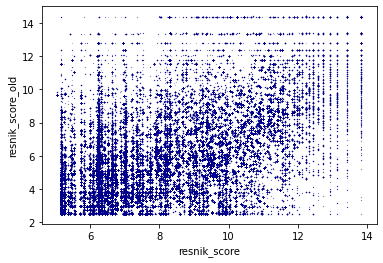

In [20]:
ax1 = intersected_scores.plot.scatter(x='resnik_score',
                                      y='resnik_score_old',
                                      c='DarkBlue',
                                      s=0.01
                                     )

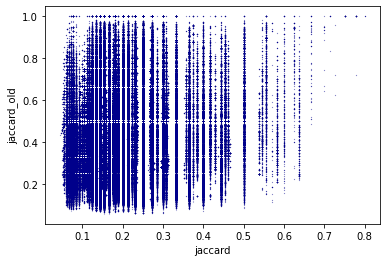

In [21]:
ax1 = intersected_scores.plot.scatter(x='jaccard',
                                      y='jaccard_old',
                                      c='DarkBlue',
                                      s=0.01
                                     )

### Which pairs have high scores in the old set and low scores in the new set?

In [18]:
intersected_scores['resnik_diff'] = intersected_scores['resnik_score_old'] - intersected_scores['resnik_score']
intersected_scores.sort_values(by='resnik_diff', ascending=False, inplace=True)
intersected_scores

,source_old,destination_old,jaccard_old,resnik_score_old,subsumer_old,source,destination,resnik_score,jaccard,resnik_diff
962688,HP:0002607,MP:0003281,1.000000,14.359005,MP_0003281;,HP:0002607,MP:0003281,5.159422,0.300000,9.199583
632818,HP:0040183,MP:0003281,0.944444,14.359005,MP_0003281;,HP:0040183,MP:0003281,5.159422,0.272727,9.199583
1327215,HP:0012700,MP:0003281,0.529412,14.351005,HP_0012700;,HP:0012700,MP:0003281,5.159422,0.333333,9.191583
1326917,HP:0012701,MP:0003281,0.500000,14.351005,HP_0012700;,HP:0012701,MP:0003281,5.159422,0.300000,9.191583
878712,HP:0012700,MP:0003281,0.529412,14.351005,HP_0012700;,MP:0003281,HP:0012700,5.159422,0.333333,9.191583
...,...,...,...,...,...,...,...,...,...,...
1071039,HP:0410188,MP:0005562,0.282051,2.508834,MP_0008469;,HP:0410188,MP:0005562,13.139874,0.300000,-10.631039
728809,HP:0410198,MP:0005562,0.321429,2.508834,MP_0008469;,MP:0005562,HP:0410198,13.139874,0.300000,-10.631039
1069220,HP:0410198,MP:0005562,0.321429,2.508834,MP_0008469;,HP:0410198,MP:0005562,13.139874,0.300000,-10.631039
2020913,HP:0002553,MP:0003761,0.222222,2.512377,HP_0000271;,HP:0002553,MP:0003761,13.833021,0.153846,-11.320644


The top 5 differences in Resnik score are for pairs involving MP:0003281 (fecal incontinence). The top HP hit in the old scores is for HP:0002607 (bowel incontinence) and even includes the synonym "Fecal incontinence", so that appears to be a very good match. The low score in the new set may reflect how the ancestors of these terms are otherwise dissimilar: 
In HP, it looks like
```
All
 Phenotypic abnormality
  Abnormality of the digestive system
   Abnormality of digestive system physiology
    Abnormal large intestine physiology
     Bowel incontinence
  Constitutional symptom
   Impairment of activities of daily living
    Impaired continence
     Bowel incontinence
```
While in MP, we have
```
mammalian phenotype
 digestive/alimentary phenotype
  abnormal digestive system physiology
   abnormal defecation
    fecal incontinence
```

The other HP terms in this top 5 are HP:0040183 (Encopresis; a child of HP:0002607), HP:0012700 (Abnormal large intestine physiology; see above), HP:0012701 (Bowel urgency; a child of HP:0012700), and HP:0012700 (that's a duplicate - shouldn't be there.